<a href="https://colab.research.google.com/github/Sarathi666/Generative_AI/blob/main/ObjDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading existing model...
Please upload an image for object detection


Saving cats.jpeg to cats.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


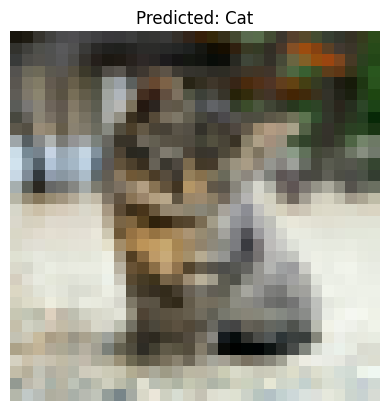

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import files
from PIL import Image
import os

# Load CIFAR-10 labels (example dataset)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Check if model exists, else train a new one
MODEL_PATH = "/content/my_trained_model.h5"

if not os.path.exists(MODEL_PATH):
    print("Model not found! Training a new model...")

    # Load dataset
    (x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
    x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize

    # Build a simple CNN model
    model = keras.Sequential([
        keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Conv2D(64, (3, 3), activation='relu'),
        keras.layers.MaxPooling2D(2, 2),
        keras.layers.Flatten(),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')  # 10 classes
    ])

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

    # Save the model
    model.save(MODEL_PATH)
    print("Model trained and saved as my_trained_model.h5")

else:
    print("Loading existing model...")
    model = keras.models.load_model(MODEL_PATH)


# Function to process and predict the uploaded image
def predict_uploaded_image(image_path):
    # Load and preprocess the image
    img = Image.open(image_path).convert("RGB")  # Convert to RGB
    img = img.resize((32, 32))  # Resize to match model input
    img_array = np.array(img) / 255.0  # Normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Predict
    predictions = model.predict(img_array)
    predicted_label = np.argmax(predictions[0])

    # Display the image with predicted label
    plt.imshow(img)
    plt.title(f"Predicted: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()


# Upload image using Google Colab
print("Please upload an image for object detection")
uploaded = files.upload()

# Get uploaded file name
file_name = list(uploaded.keys())[0]

# Predict object in the uploaded image
predict_uploaded_image(file_name)
